<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day8_ML_salespred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 8 Machine Learning (ML)  

# New section

In [ ]:
# Importing Libraries
import numpy as np  # For arrays
import pandas as pd # For Data frames and Series
import matplotlib.pyplot as plt  # For ploting
from sklearn.model_selection import train_test_split # Spliting, Training, Testing Datset
from sklearn.linear_model import LinearRegression # Model
import seaborn as sns #Making Colorful graphs
from sklearn.metrics import mean_squared_error,r2_score # Import Metrics Mean square Error

In [ ]:
# load the data set
data = pd.read_csv("/content/drive/MyDrive/Data Science Boot Camp/week2/day_8/Advertising.csv")

In [ ]:
# head() method returns a specified number of rows, string from the top.
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# tail() method returns a specified number of last rows.
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
# to fetch the dimensions of Pandas and NumPy type objects in python
data.shape

(200, 5)

In [ ]:
# calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
a = data.describe()

In [ ]:
# Checking the type of variable
type(a)

pandas.core.frame.DataFrame

In [ ]:
# Printing the variable
a

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
# Allocating the "TV" column values to variable "b"
b = a.get("TV")

In [ ]:
# Printing the values in b variable
b

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64

In [ ]:
# type of variable b
type(b)

pandas.core.series.Series

In [ ]:
# Get the values of mean from variable b
b.get('mean')

147.0425

In [ ]:
# info() method prints information about the DataFrame.
#The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


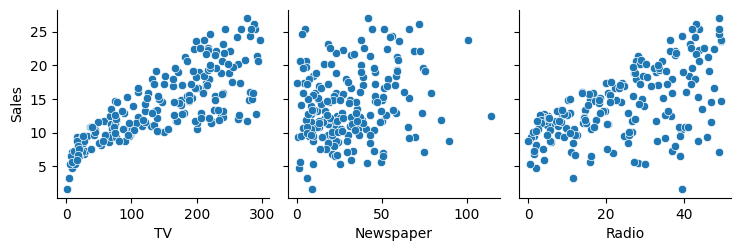

In [ ]:
# Scatter plot of each column (X) agaisnt sales (Y) using seabon
sns.pairplot(data, x_vars=["TV", "Newspaper", "Radio"], y_vars = "Sales", kind='scatter')
plt.show()

In [ ]:
data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


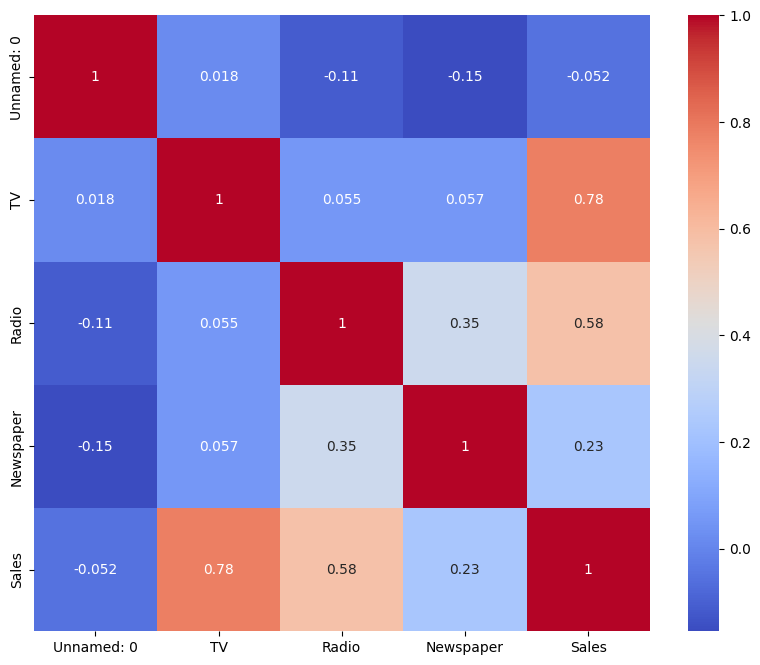

In [ ]:
# Correlation beteen different colomns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

In [ ]:
X = data['Radio'].values.reshape(-1,1)
Y = data['Sales'].values.reshape(-1,1)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=100)

In [ ]:
X_train.shape

(140, 1)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

In [ ]:
print("Mean Squared Error: ", mse)
print("R^2 Score: ", r2)

Mean Squared Error:  11.388611592147727
R^2 Score:  0.4207007355904727


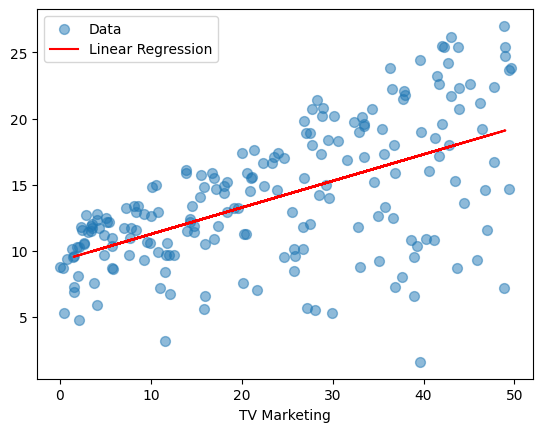

In [ ]:
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.xlabel('TV Marketing')
plt.legend()
plt.show()